In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

itemdata = pd.read_excel("StockTables.xlsx", sheet_name='Item')
categorydata = pd.read_excel("StockTables.xlsx", sheet_name='Category')
companydata = pd.read_excel("StockTables.xlsx", sheet_name='Company')
masterdata= pd.read_excel("StockTables.xlsx", sheet_name='Master')
detailsdata= pd.read_excel("StockTables.xlsx", sheet_name='Details')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
#make a directory use CompanyId and CompanyName
list1=dict(zip(companydata.CompanyId, companydata.CompanyName))
list1

{101: 'MILLENNIUM TEA TRADERS',
 102: 'COMPLETE ELECTRONICS & TECHNOLOGIES',
 103: 'Demo Shop ',
 104: 'New Vision Medi System',
 105: 'M/S. S.N. MACHINERY',
 106: 'Padma LPG Limited-Factory',
 107: 'Unified Communications Ltd',
 108: 'SUNGLAZE',
 109: 'TWIN MOTORS',
 110: 'M/S Laila Enterprise',
 111: 'S.L. Corporation',
 112: 'Z.M.S Steel/M. Corporation',
 113: 'SAFWAN MOTORS',
 114: 'Woodland Door & Design',
 115: 'M/S ISLAM STORE',
 116: 'M/S. S.S Enterprise(Sister Concern of Kohinoor Cables)',
 117: 'Shah Amir Fish Traders',
 118: 'Woodland Door Gallery'}

In [4]:
#make a directory use ItemId and Name
list2=dict(zip(itemdata.ItemId, itemdata.Name))
list2

{101010001: 'MTT-MHT-500 MILLENNIUM HOTEL 500 GM',
 101010003: 'MTT-MCT-500 MILLENNIUM CLONE TEA 500 GM',
 101010005: 'MTT-MBT-500 MILLENNIUM BLACK TEA 500 GM',
 101010006: 'Mill Tea CD Clone',
 101010007: 'MTT-MBT-100 MILLENNIUM BLACK TEA 100GM',
 101010012: 'MTT-MST-500 MILLENNIUM SPECIAL TEA 500 GM',
 101010014: 'MST',
 101010015: 'MTT-MST-200 MILLENNIUM SPECIAL TEA 200 GM',
 101010016: 'MTT-MST-1000 MILLENNIUM SPECIAL TEA 500*2 GM',
 101010017: 'BSTEAm',
 101010019: 'MTT-MHT-1000 MILLENNIUM HOTEL TEA 500*2 GM',
 101010021: 'MTT-MBT-1000 MILLENNIUM BLACK TEA 500*2 GM',
 101010022: 'MTT-DMS-500  DIVIBESAVERY TEA 500 GM',
 101010023: 'MTT-INBT-BLACK 500 GM',
 101010024: 'MTT-INST-SPECIAL 500 GM',
 101010025: 'MTT-INST-SPECIAL 200 GM',
 101010026: 'MMT-MCT- MILLENNIUM CLONE  500 GM*2 ',
 101010027: nan,
 101010028: 'MCT',
 101010029: 'GREEN TEA',
 101010031: 'GREEN TEA  80g (40bags)',
 101010032: 'AMLOKI TEA   80 GM  (40bags)',
 101010033: 'TRIPHALA TEA  80 GM (40bags)',
 101010034: 'A

In [5]:
#make a directory use ItemId and Name
list3=dict(zip(categorydata.CategoryId, categorydata.CategoryName))
list3

{10101: 'TEA',
 10102: 'STATIONARY',
 10103: 'LEAF',
 10104: 'RBM MULTI TRADE CORPORATION',
 10105: 'BANK',
 10106: 'PRODUCTS',
 10107: 'BLANK PACKET',
 10108: 'PRINTING PACKET',
 10109: 'l',
 10110: ' MILLENNIUM HANEY ',
 10111: 'MODE',
 10112: 'MILLENNIUM MODU',
 10113: 'KOYEL',
 10114: 'COIL',
 10115: 'SALT',
 10116: 'Mustard oil',
 10117: 'Mizeenia Floor 1 (Godown)',
 10118: 'PUFFED RICE',
 10119: 'MILL  SALT',
 10120: 'LENTIL ',
 10121: 'Aromatic Clnlgura Rice',
 10122: 'FOOD',
 10123: 'চিনি গুডা Aromatic Chinigura Rice 1kg',
 10124: 'মুসুর ডাল Lentil',
 10125: 'চিনি  sugar',
 10126: 'OIL',
 10127: 'SUGAR',
 10128: 'DR.H & H TEA',
 10129: 'Packing Machine',
 10130: 'MODHU HONEY (মধু)',
 10131: 'PUFFED RICE মুড়ি',
 10132: 'Sugar চিনি 1kg',
 10133: 'Aromatic Chinigura চিনি গুডা Rice 1kg',
 10134: 'Puffed Rice মুড়ি  kg',
 10135: 'MTT -PUFFED RICE',
 10136: 'Aromatic Chinigura ',
 10137: 'STATIONERY',
 10138: 'SPOON ',
 10139: 'PALATE',
 10140: 'BUCKET - BULTI ',
 10141: 'PALATE PC- '

In [6]:
data1=detailsdata.CompanyId.map(list1)
data1

0        MILLENNIUM TEA TRADERS
1        MILLENNIUM TEA TRADERS
2        MILLENNIUM TEA TRADERS
3        MILLENNIUM TEA TRADERS
4        MILLENNIUM TEA TRADERS
                  ...          
87021     Woodland Door Gallery
87022     Woodland Door Gallery
87023     Woodland Door Gallery
87024     Woodland Door Gallery
87025     Woodland Door Gallery
Name: CompanyId, Length: 87026, dtype: object

In [7]:
data2=detailsdata.ItemId.map(list2)
data2

0                                   OODALEAH BOP
1                                     JHEMAI  PF
2                             MOOMINCHERRA  GBOP
3                              MOOMINCHERRA  FOF
4                                 AMEENABAD FBOP
                          ...                   
87021        LOHA DOOR FRAME- 42'X84''X6''X2.5''
87022       LOHA DOOR FRAME- 48'X84''X11''X2.5''
87023                 SEGUN CTG -39''X81''X1.5''
87024                       BENGAL DOOR- 4'' (R)
87025    MEAHGONI DOOR FRAME- 42'X84''X6''X2.5''
Name: ItemId, Length: 87026, dtype: object

In [8]:
data3=detailsdata.CategoryId.map(list3)
data3

0         TEA
1         TEA
2         TEA
3         TEA
4         TEA
         ... 
87021    DOOR
87022    DOOR
87023    DOOR
87024    DOOR
87025    DOOR
Name: CategoryId, Length: 87026, dtype: object

In [9]:
#create dataFrame 
data1=pd.DataFrame(data1)
data1

,CompanyId
0,MILLENNIUM TEA TRADERS
1,MILLENNIUM TEA TRADERS
2,MILLENNIUM TEA TRADERS
3,MILLENNIUM TEA TRADERS
4,MILLENNIUM TEA TRADERS
...,...
87021,Woodland Door Gallery
87022,Woodland Door Gallery
87023,Woodland Door Gallery
87024,Woodland Door Gallery


In [10]:
#create dataFrame 
data2=pd.DataFrame(data2)
data2

,ItemId
0,OODALEAH BOP
1,JHEMAI PF
2,MOOMINCHERRA GBOP
3,MOOMINCHERRA FOF
4,AMEENABAD FBOP
...,...
87021,LOHA DOOR FRAME- 42'X84''X6''X2.5''
87022,LOHA DOOR FRAME- 48'X84''X11''X2.5''
87023,SEGUN CTG -39''X81''X1.5''
87024,BENGAL DOOR- 4'' (R)


In [11]:
data3=pd.DataFrame(data3)
data3

,CategoryId
0,TEA
1,TEA
2,TEA
3,TEA
4,TEA
...,...
87021,DOOR
87022,DOOR
87023,DOOR
87024,DOOR


In [12]:
detailsdata.head()

,Id,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,Unnamed: 17,Unnamed: 18,CategoryId,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,9307,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 20:16:58.380,70.32.28.35,NaN,NaN,NaT,NaN,NaN
1,9309,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:14:21.210,70.32.28.35,NaN,NaN,NaT,NaN,NaN
2,9310,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:15:19.717,70.32.28.35,NaN,NaN,NaT,NaN,NaN
3,9311,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:16:08.377,70.32.28.35,NaN,NaN,NaT,NaN,NaN
4,9312,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:23:50.563,70.32.28.35,NaN,NaN,NaT,NaN,NaN


In [13]:
detailsdata.drop(['Id','Unnamed: 17','Unnamed: 18','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26'],axis=1, inplace=True)

In [14]:
detailsdata = pd.concat([detailsdata, data1], axis=1)
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyId
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery


In [15]:
detailsdata.columns.values[17] = "CompanyName"
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery


In [16]:
detailsdata = pd.concat([detailsdata, data2], axis=1)
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemId
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5''
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5''
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5''
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R)


In [17]:
detailsdata.columns.values[18] = "ItemName"
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5''
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5''
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5''
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R)


In [18]:
detailsdata = pd.concat([detailsdata, data3], axis=1)
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryId
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5'',DOOR
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5'',DOOR
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R),DOOR


In [19]:
detailsdata.columns.values[19] = "CategoryName"
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5'',DOOR
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5'',DOOR
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R),DOOR


In [20]:
detailsdata['day'] = detailsdata['Date'].dt.day
detailsdata['month'] = detailsdata['Date'].dt.month

In [21]:
detailsdata['Day']=detailsdata['Year']*365+detailsdata['month']*30+detailsdata['day']

In [22]:
detailsdata.Type.unique()

array(['BUY', 'IISS', 'IREC', 'IRTB', 'IRTS', 'SALE', 'ITRF'],
      dtype=object)

In [23]:
buy_data = detailsdata[detailsdata['Type'] == 'BUY']
Iiss_data = detailsdata[detailsdata['Type'] == 'IISS']
Irec_data = detailsdata[detailsdata['Type'] == 'IREC']
Irtb_data = detailsdata[detailsdata['Type'] == 'IRTB']
Irts_data = detailsdata[detailsdata['Type'] == 'IRTS']
sale_data = detailsdata[detailsdata['Type'] == 'SALE']
Itrf_data = detailsdata[detailsdata['Type'] == 'ITRF']

# which category product buy more

In [24]:
new_buy=buy_data.groupby("CategoryName").sum()
new_buy

,CompanyId,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
CategoryName,,,,,,,,,,,,,,,,,,
BALL VALVE,618,12102,121020051,0.0,61850.0,6.190180e+09,8,619160008,63.00,150230.00,2.600910e+06,0.0,0.0,2.600910e+06,61872,64,54,4418914
BATTERY,17402,311107,3111072283,0.0,1740503.0,1.743326e+11,8717,17408128425,2573.00,371874.50,6.460490e+05,0.0,0.0,6.460490e+05,1740970,3766,1601,113605851
CHANGCHAI,12600,242040,2420401226,0.0,1260124.0,1.261892e+11,2193,12618510798,8230.00,1566163.84,1.472096e+07,0.0,0.0,1.472096e+07,1260240,1495,291,88354825
CHICKEN,33578,658609,6586105401,0.0,3364003.0,3.363988e+11,457,33759580948,77181.00,2512754.00,5.711506e+07,0.0,0.0,5.711506e+07,3358126,5214,2049,240458969
CST TYRE,927,18153,181530107,0.0,92781.0,9.288270e+09,12,929570014,9.00,163.00,1.630000e+02,0.0,0.0,1.630000e+02,92799,119,81,6628394
DOOR,6608,113232,1132320245,0.0,660856.0,6.619368e+10,284,6610320662,217.00,487951.67,1.397660e+06,0.0,0.0,1.397660e+06,660856,1188,56,41332548
ECG,42536,825398,8253987118,0.0,4254009.0,4.259694e+11,1054,42629713126,6349.00,3422332.00,7.204052e+06,0.0,0.0,7.204052e+06,4254009,6275,2559,301353315
EXPORT ITEM,4329,74777,747770703,0.0,432940.0,4.336511e+10,37,4329780037,577975.90,5160.62,6.040950e+07,0.0,0.0,6.040950e+07,432937,688,336,27304373
Fiber Optics,1070,20180,201800035,0.0,107012.0,1.072030e+10,22,1070120036,9626.00,54691.96,1.051588e+06,0.0,0.0,1.051588e+06,107010,100,100,7368800


In [25]:
new_buy=new_buy[['Qty','Amount','Rate']]
new_buy

,Qty,Amount,Rate
CategoryName,,,
BALL VALVE,63.00,2.600910e+06,150230.00
BATTERY,2573.00,6.460490e+05,371874.50
CHANGCHAI,8230.00,1.472096e+07,1566163.84
CHICKEN,77181.00,5.711506e+07,2512754.00
CST TYRE,9.00,1.630000e+02,163.00
DOOR,217.00,1.397660e+06,487951.67
ECG,6349.00,7.204052e+06,3422332.00
EXPORT ITEM,577975.90,6.040950e+07,5160.62
Fiber Optics,9626.00,1.051588e+06,54691.96


In [26]:
#base on Qty
new_buy.sort_values(by='Qty', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
EXPORT ITEM,577975.90,6.040950e+07,5160.62
TEA,376336.78,7.902607e+07,123217.41
SAFETY ITEM,158227.50,8.796038e+06,1918550.92
REFLECTIVE GLASS,123991.00,1.027822e+07,249.00
WATER HEATER (GEYSER),121291.00,9.585317e+08,5457735.00
CHICKEN,77181.00,5.711506e+07,2512754.00
Fiber Optics,9626.00,1.051588e+06,54691.96
CHANGCHAI,8230.00,1.472096e+07,1566163.84
SPARE PARTS,6975.00,1.158153e+06,759729.10


In [27]:
#base on amount
new_buy.sort_values(by='Amount', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),121291.00,9.585317e+08,5457735.00
TEA,376336.78,7.902607e+07,123217.41
EXPORT ITEM,577975.90,6.040950e+07,5160.62
CHICKEN,77181.00,5.711506e+07,2512754.00
CHANGCHAI,8230.00,1.472096e+07,1566163.84
REFLECTIVE GLASS,123991.00,1.027822e+07,249.00
SAFETY ITEM,158227.50,8.796038e+06,1918550.92
ECG,6349.00,7.204052e+06,3422332.00
WOOD DOOR,2335.00,5.181402e+06,2172054.55


In [28]:
#base on Rate
new_buy.sort_values(by='Rate', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),121291.00,9.585317e+08,5457735.00
ECG,6349.00,7.204052e+06,3422332.00
CHICKEN,77181.00,5.711506e+07,2512754.00
WOOD DOOR,2335.00,5.181402e+06,2172054.55
SAFETY ITEM,158227.50,8.796038e+06,1918550.92
CHANGCHAI,8230.00,1.472096e+07,1566163.84
SPARE PARTS,6975.00,1.158153e+06,759729.10
DOOR,217.00,1.397660e+06,487951.67
BATTERY,2573.00,6.460490e+05,371874.50


# Yearly investment prediction

<AxesSubplot:xlabel='Year', ylabel='Amount'>

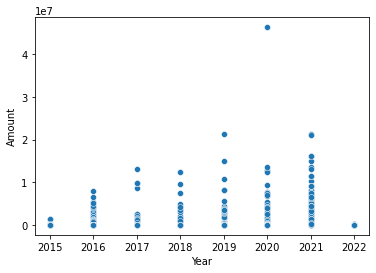

In [29]:
sns.scatterplot(x=buy_data.Year, y=buy_data.Amount, data=buy_data)

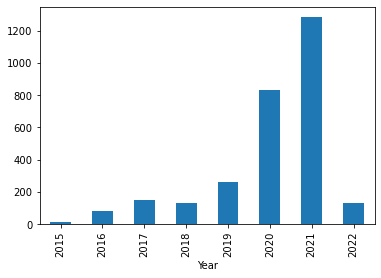

In [30]:
buy_data.groupby('Year')['Amount'].nunique().plot(kind='bar')
plt.show()

In [31]:
invest_year= {}
for year, year_data in buy_data.groupby('Year'):
            print(type,year, year_data['Amount'].sum())
            invest_year[year] =year_data['Amount'].sum() 

<class 'type'> 2015 4204152.0
<class 'type'> 2016 72105925.0
<class 'type'> 2017 72651047.12
<class 'type'> 2018 81754033.36
<class 'type'> 2019 139919702.32
<class 'type'> 2020 260470997.94
<class 'type'> 2021 584917111.97
<class 'type'> 2022 2082036.07


In [32]:
data = []
for year in invest_year:
    if(year!=2022):
        data.append([year, invest_year[year]])

df = pd.DataFrame(data, columns = ['Year', 'YearAmount'])
x = df.drop(['YearAmount'],axis='columns')
y = df.YearAmount

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [35]:
rnf=RandomForestRegressor()
svr=SVR()
lr=LinearRegression()
dr=DecisionTreeRegressor()

In [36]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc_lr = r2_score(y_test,y_pred)

rnf.fit(x_train,y_train)
y_pred=rnf.predict(x_test)
acc_rnf =r2_score(y_test,y_pred)

svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
acc_svr = r2_score(y_test,y_pred)


dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)
acc_dr =r2_score(y_test,y_pred)

In [37]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Rgression',
              'Random Forest Regression','Decision Tree Regression'],
    'Score': [acc_svr, acc_lr,
              acc_rnf, acc_dr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree Regression,0.197092
1,Linear Rgression,0.171443
2,Random Forest Regression,0.042418
0,Support Vector Machines,-0.930183


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
value = scaler.fit_transform([[2022]])

In [39]:
print("2022  orginal amount 2082036.07tk ")
lr_predict=lr.predict(value)
print("2022 predict amount ", lr_predict ,"tk of Linear Rgression")
rnf_predict=rnf.predict(value)
print("2022 predict amount ", rnf_predict, "tk of Random Forest Regression")
svr_predict=svr.predict(value)
print("2022 predict amount", svr_predict, "tk of Support Vector Machines")
dr_predict=dr.predict(value)
print("2022 predict amount", dr_predict, "tk of Decision Tree Regression")

2022  orginal amount 2082036.07tk 
2022 predict amount  [1732228.24232365] tk of Linear Rgression
2022 predict amount  [23794654.9848] tk of Random Forest Regression
2022 predict amount [81754030.94783925] tk of Support Vector Machines
2022 predict amount [4204152.] tk of Decision Tree Regression


# per day investment 

In [40]:
invest_day= {}
for day, day_data in buy_data.groupby('Day'):
            print(day, day_data['Amount'].sum())
            invest_day[day] =day_data['Amount'].sum() 

735746 2200000.0
735754 32500.0
735755 0.0
735776 0.0
735780 11000.0
735792 1500000.0
735794 367452.0
735796 0.0
735804 2200.0
735806 21000.0
735809 54000.0
735811 0.0
735814 5000.0
735824 0.0
735831 0.0
735847 11000.0
735885 0.0
735888 11000.0
735901 0.0
735902 0.0
735917 0.0
735918 0.0
735938 108500.0
735951 11000.0
735963 81000.0
735970 3400.0
735988 13000.0
735994 0.0
736021 29543825.0
736032 0.0
736038 0.0
736041 0.0
736049 525000.0
736050 0.0
736066 0.0
736071 2197000.0
736077 11037200.0
736098 8000.0
736110 0.0
736111 100000.0
736117 131500.0
736137 8000.0
736139 0.0
736148 0.0
736149 0.0
736159 0.0
736171 0.0
736189 0.0
736190 21661500.0
736198 6606000.0
736222 60000.0
736223 0.0
736243 25724000.0
736261 7000.0
736267 0.0
736277 9480920.0
736278 5500.0
736285 0.0
736291 49500.0
736296 10400.0
736297 3102507.12
736299 850.0
736301 42000.0
736302 280180.0
736303 132000.0
736304 6000.0
736308 13500.0
736309 17200.0
736311 15200.0
736313 12100.0
736315 750.0
736317 1445000.0
736320

737967 767446.4
737968 15160.0
737969 12094.0
737970 25952210.0
737971 2780.0
737972 65631.59
737974 27375.0
737975 95510.0
737976 88760.0
737977 113995.0
737978 5700.0
737979 178760.0
737981 32300.0
737982 29316.0
737983 2226.0
737984 20.0
737986 0.0
737988 7755.0
737989 8240.0
737990 180797.04
737991 7884208.0
737992 90110.0
737993 275768.1
737995 62765.0
737996 311423.0
737997 167117.0
737998 110964.31000000001
737999 53500.0
738001 73290.0
738002 6960.0
738003 720.2
738004 24335.0
738005 148860.2
738006 45850.0
738008 5840.0
738009 3800.0
738010 10320.0
738011 114116.0
738012 6270.0
738013 27000.0
738015 80982.04000000001
738016 140700.0
738017 19693416.18
738018 221056.29
738019 254547.0
738020 90020.0
738021 0.0
738022 63990.04
738023 50000.0
738025 260250.0
738026 204064.78
738029 5969290.0
738030 10240.0
738031 54101.0
738032 27024000.0
738033 2530.0
738034 0.0
738036 60874.0
738037 5110.0
738038 2130.0
738040 2500.0
738043 795.0
738044 4620.0
738045 129110.3
738046 1920.0
7380

In [41]:
data1 = []
for day in invest_day:
    if(day!=738091):
        data1.append([day, invest_day[day]])

df = pd.DataFrame(data1, columns = ['Day', 'DayAmount'])


In [42]:
df = df.replace(0, np.nan)

In [43]:
df.dropna(subset = ["DayAmount"], inplace=True)

In [44]:
x1 = df.drop(['DayAmount'],axis='columns')
y1 = df.DayAmount

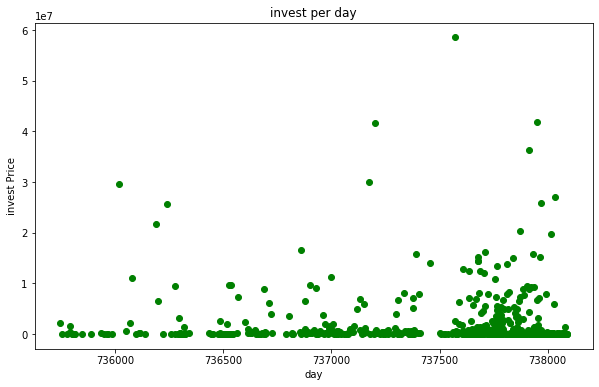

In [45]:
plt.figure(figsize=(10,6))
plt.xlabel('day')
plt.ylabel('invest Price')
plt.title('invest per day')
plt.scatter(x1,y1, marker='o', color='g')

In [46]:
df=df.reset_index()['DayAmount']

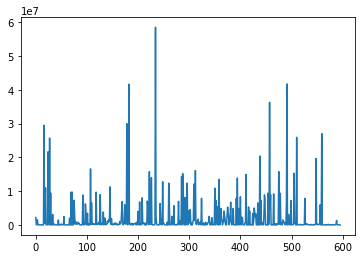

In [47]:
import matplotlib.pyplot as plt
plt.plot(df)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [49]:
##splitting dataset into train and test split
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [50]:
training_size,test_size

(447, 149)

In [51]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [52]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [53]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [56]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 13s 747ms/step - loss: 0.0089 - accuracy: 0.0116 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 2s 275ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 2s 260ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 1s 239ms/step - loss: 0.0083 - accuracy: 0.0116 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 1s 249ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 1s 230ms/step - loss: 0.0083 - accuracy: 0.0116 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 1s 244ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0070 - val_accur

6/6 [==============================] - 1s 224ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 58/100
6/6 [==============================] - 1s 221ms/step - loss: 0.0083 - accuracy: 0.0116 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 59/100
6/6 [==============================] - 2s 297ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 60/100
6/6 [==============================] - 1s 227ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 61/100
6/6 [==============================] - 1s 245ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 62/100
6/6 [==============================] - 1s 241ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 63/100
6/6 [==============================] - 2s 290ms/step - loss: 0.0082 - accuracy: 0.0116 - val_loss: 0.0069 - val_accuracy: 0.

In [57]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [58]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [59]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2605248.0916994964

In [60]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2928684.8223052574

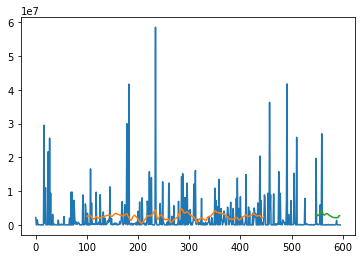

In [61]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [62]:
x_input=test_data[49:].reshape(1,-1)
x_input.shape

(1, 100)

In [63]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [64]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.04935165]
101
1 day input [2.05529469e-03 9.46873644e-04 1.22948255e-01 1.39426931e-04
 1.64097369e-03 8.95815894e-04 1.29667899e-03 3.67005407e-03
 2.61232791e-01 1.03239179e-02 1.31048747e-02 2.58703980e-04
 2.06348442e-04 4.43164187e-01 4.73009917e-05 1.12056545e-03
 4.67289400e-04 1.63077426e-03 1.51551011e-03 1.94642727e-03
 9.71634090e-05 3.05236544e-03 5.51389539e-04 5.00434247e-04
 3.78407934e-05 1.70761703e-07 1.32254939e-04 1.40536882e-04
 3.08715028e-03 1.34631908e-01 1.53856294e-03 4.70889228e-03
 1.07161507e-03 5.31774142e-03 2.85354759e-03 1.89467469e-03
 9.13404350e-04 1.25134176e-03 1.18679384e-04 1.21274962e-05
 4.15377843e-04 2.54179137e-03 7.82771647e-04 9.95540729e-05
 6.47186855e-05 1.76055316e-04 1.94849349e-03 1.06896826e-04
 4.60885837e-04 1.38269235e-03 2.40244640e-03 3.36287958e-01
 3.77462409e-03 4.34651716e-03 1.53702609e-03 1.09253406e-03
 8.53637754e-04 4.44390256e-03 3.48447418e-03 1.01932442e-01
 1.74689222e-04 9.23667128e-04 4.61466256e-01 4.30319492

6 day output [[0.04729979]]
7 day input [1.29667899e-03 3.67005407e-03 2.61232791e-01 1.03239179e-02
 1.31048747e-02 2.58703980e-04 2.06348442e-04 4.43164187e-01
 4.73009917e-05 1.12056545e-03 4.67289400e-04 1.63077426e-03
 1.51551011e-03 1.94642727e-03 9.71634090e-05 3.05236544e-03
 5.51389539e-04 5.00434247e-04 3.78407934e-05 1.70761703e-07
 1.32254939e-04 1.40536882e-04 3.08715028e-03 1.34631908e-01
 1.53856294e-03 4.70889228e-03 1.07161507e-03 5.31774142e-03
 2.85354759e-03 1.89467469e-03 9.13404350e-04 1.25134176e-03
 1.18679384e-04 1.21274962e-05 4.15377843e-04 2.54179137e-03
 7.82771647e-04 9.95540729e-05 6.47186855e-05 1.76055316e-04
 1.94849349e-03 1.06896826e-04 4.60885837e-04 1.38269235e-03
 2.40244640e-03 3.36287958e-01 3.77462409e-03 4.34651716e-03
 1.53702609e-03 1.09253406e-03 8.53637754e-04 4.44390256e-03
 3.48447418e-03 1.01932442e-01 1.74689222e-04 9.23667128e-04
 4.61466256e-01 4.30319492e-05 1.03932403e-03 8.70884686e-05
 3.62014811e-05 4.25196641e-05 1.34047937e-05

 4.78075109e-02 4.85832170e-02 5.37442863e-02 5.45856059e-02]
12 day output [[0.0552026]]
13 day input [2.06348442e-04 4.43164187e-01 4.73009917e-05 1.12056545e-03
 4.67289400e-04 1.63077426e-03 1.51551011e-03 1.94642727e-03
 9.71634090e-05 3.05236544e-03 5.51389539e-04 5.00434247e-04
 3.78407934e-05 1.70761703e-07 1.32254939e-04 1.40536882e-04
 3.08715028e-03 1.34631908e-01 1.53856294e-03 4.70889228e-03
 1.07161507e-03 5.31774142e-03 2.85354759e-03 1.89467469e-03
 9.13404350e-04 1.25134176e-03 1.18679384e-04 1.21274962e-05
 4.15377843e-04 2.54179137e-03 7.82771647e-04 9.95540729e-05
 6.47186855e-05 1.76055316e-04 1.94849349e-03 1.06896826e-04
 4.60885837e-04 1.38269235e-03 2.40244640e-03 3.36287958e-01
 3.77462409e-03 4.34651716e-03 1.53702609e-03 1.09253406e-03
 8.53637754e-04 4.44390256e-03 3.48447418e-03 1.01932442e-01
 1.74689222e-04 9.23667128e-04 4.61466256e-01 4.30319492e-05
 1.03932403e-03 8.70884686e-05 3.62014811e-05 4.25196641e-05
 1.34047937e-05 7.87211451e-05 2.20453871e-

20 day output [[0.05303597]]
21 day input [9.71634090e-05 3.05236544e-03 5.51389539e-04 5.00434247e-04
 3.78407934e-05 1.70761703e-07 1.32254939e-04 1.40536882e-04
 3.08715028e-03 1.34631908e-01 1.53856294e-03 4.70889228e-03
 1.07161507e-03 5.31774142e-03 2.85354759e-03 1.89467469e-03
 9.13404350e-04 1.25134176e-03 1.18679384e-04 1.21274962e-05
 4.15377843e-04 2.54179137e-03 7.82771647e-04 9.95540729e-05
 6.47186855e-05 1.76055316e-04 1.94849349e-03 1.06896826e-04
 4.60885837e-04 1.38269235e-03 2.40244640e-03 3.36287958e-01
 3.77462409e-03 4.34651716e-03 1.53702609e-03 1.09253406e-03
 8.53637754e-04 4.44390256e-03 3.48447418e-03 1.01932442e-01
 1.74689222e-04 9.23667128e-04 4.61466256e-01 4.30319492e-05
 1.03932403e-03 8.70884686e-05 3.62014811e-05 4.25196641e-05
 1.34047937e-05 7.87211451e-05 2.20453871e-03 3.26154853e-05
 1.29591056e-03 4.83067782e-04 1.42074420e-04 2.70732435e-03
 8.34222148e-04 2.98662219e-04 2.56142555e-07 4.68570113e-05
 8.53637754e-04 6.83046812e-07 2.17932916e-

 4.93858606e-02 4.77443226e-02 4.61782739e-02 4.47072908e-02]
26 day output [[0.04331341]]
27 day input [1.32254939e-04 1.40536882e-04 3.08715028e-03 1.34631908e-01
 1.53856294e-03 4.70889228e-03 1.07161507e-03 5.31774142e-03
 2.85354759e-03 1.89467469e-03 9.13404350e-04 1.25134176e-03
 1.18679384e-04 1.21274962e-05 4.15377843e-04 2.54179137e-03
 7.82771647e-04 9.95540729e-05 6.47186855e-05 1.76055316e-04
 1.94849349e-03 1.06896826e-04 4.60885837e-04 1.38269235e-03
 2.40244640e-03 3.36287958e-01 3.77462409e-03 4.34651716e-03
 1.53702609e-03 1.09253406e-03 8.53637754e-04 4.44390256e-03
 3.48447418e-03 1.01932442e-01 1.74689222e-04 9.23667128e-04
 4.61466256e-01 4.30319492e-05 1.03932403e-03 8.70884686e-05
 3.62014811e-05 4.25196641e-05 1.34047937e-05 7.87211451e-05
 2.20453871e-03 3.26154853e-05 1.29591056e-03 4.83067782e-04
 1.42074420e-04 2.70732435e-03 8.34222148e-04 2.98662219e-04
 2.56142555e-07 4.68570113e-05 8.53637754e-04 6.83046812e-07
 2.17932916e-03 3.86619352e-04 7.14057138e

In [65]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

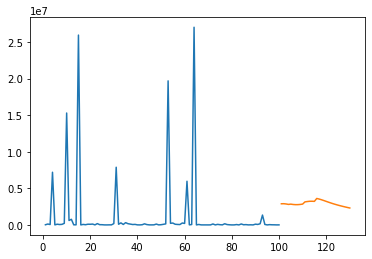

In [66]:
plt.plot(day_new,scaler.inverse_transform(df[496:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

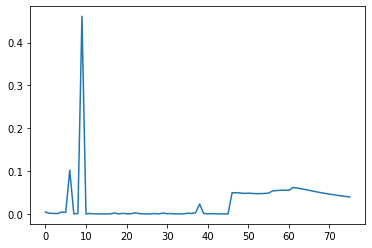

In [67]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[550:])

In [68]:
df1=scaler.inverse_transform(df1).tolist()
df1

[[2200000.0],
 [32499.999999999996],
 [11000.0],
 [1500000.0],
 [367452.0],
 [2200.0],
 [21000.0],
 [54000.0],
 [5000.0],
 [11000.0],
 [11000.0],
 [108500.0],
 [11000.0],
 [81000.0],
 [3400.0],
 [13000.0],
 [29543824.999999996],
 [525000.0],
 [2197000.0],
 [11037200.0],
 [8000.0],
 [100000.0],
 [131500.0],
 [8000.0],
 [21661500.0],
 [6606000.0],
 [60000.0],
 [25724000.0],
 [7000.0],
 [9480920.0],
 [5500.0],
 [49500.0],
 [10400.0],
 [3102507.12],
 [850.0],
 [42000.0],
 [280180.0],
 [132000.0],
 [6000.0],
 [13500.0],
 [17200.0],
 [15200.0],
 [12100.0],
 [750.0],
 [1445000.0],
 [11890.0],
 [120440.00000000001],
 [1900.0],
 [120.00000000000001],
 [122000.0],
 [266000.0],
 [12000.0],
 [72500.0],
 [30000.0],
 [28000.0],
 [2500615.0],
 [100340.0],
 [68.00000000000001],
 [20.0],
 [15000.0],
 [94.50000000000001],
 [1100.0],
 [360.0],
 [48000.0],
 [48000.0],
 [60.00000000000001],
 [2000000.0000000002],
 [400.0],
 [85.0],
 [9717400.0],
 [300.0],
 [9717400.0],
 [85.0],
 [780.0],
 [188282.5],
 [730

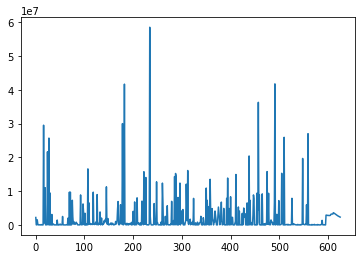

In [69]:
plt.plot(df1)

In [70]:
df1[597]

[2898738.637855649]

# work Sale Dataset

In [71]:
data=sale_data
data

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
2095,101,SALE,2001-02-07,2001,20010001,10101.0,NaN,1.011030e+09,1,101010041,40.0,350.0,14000.0,0.0,0.0,14000.0,10101,MILLENNIUM TEA TRADERS,COMBO BOX - 120GR (60bags),TEA,7,2,730432
2096,101,SALE,2001-02-07,2001,20010001,10101.0,NaN,1.011030e+09,2,101010003,100.0,320.0,32000.0,0.0,0.0,32000.0,10101,MILLENNIUM TEA TRADERS,MTT-MCT-500 MILLENNIUM CLONE TEA 500 GM,TEA,7,2,730432
2097,101,SALE,2001-02-07,2001,20010001,10101.0,NaN,1.011030e+09,3,101010007,50.0,360.0,18000.0,0.0,0.0,18000.0,10101,MILLENNIUM TEA TRADERS,MTT-MBT-100 MILLENNIUM BLACK TEA 100GM,TEA,7,2,730432
2098,101,SALE,2018-02-27,2018,20180004,10102.0,NaN,1.011030e+09,1,101030393,110.0,220.0,24200.0,0.0,0.0,24200.0,10101,MILLENNIUM TEA TRADERS,MOTRI BOP,TEA,27,2,736657
2099,101,SALE,2018-02-27,2018,20180004,10102.0,NaN,1.011030e+09,2,101030144,55.0,202.0,11110.0,0.0,0.0,11110.0,10101,MILLENNIUM TEA TRADERS,KHADIM A/C GOOLNI OF,TEA,27,2,736657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5'',DOOR,31,1,738091
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR,31,1,738091
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5'',DOOR,1,2,738091
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R),DOOR,1,2,738091


# Which category product sale more

In [72]:
new_sale=data.groupby("CategoryName").sum()
new_sale

,CompanyId,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
CategoryName,,,,,,,,,,,,,,,,,,
BALL VALVE,309,6051,60510074,30925.0,0.0,3.093090e+09,4,309440004,35.00,3.020000e+02,2.690000e+03,10.0,24.0,2.666000e+03,30936,82,27,2209507
BATTERY,41245,737671,7376762751,4125224.0,0.0,4.128260e+11,5492,41259775302,767.00,2.135434e+05,2.487100e+05,0.0,0.0,2.487100e+05,4126325,5300,2013,269315605
CHANGCHAI,22470,431638,4316398055,2247224.0,0.0,2.249204e+11,428,22502620695,6381.00,2.054272e+06,1.095777e+07,0.0,0.0,1.095777e+07,2247428,3206,571,157568206
CHICKEN,29767,583838,5838392530,2981741.0,0.0,2.979677e+11,352,29916280794,27281.00,2.962713e+06,5.987402e+08,2682.0,7914526.0,5.908257e+08,2976989,4532,1820,213160002
CST TYRE,1339,26221,262210220,134024.0,0.0,1.340339e+10,13,1342140019,35.00,3.340000e+02,1.026000e+03,70.0,21.6,1.004400e+03,134043,262,116,9574407
DONG FENG,105,2017,20170157,10501.0,0.0,1.051030e+09,1,105150003,1.00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,10501,25,4,736350
DOOR,4366,74814,748140432,436637.0,0.0,4.369811e+10,67,4367160787,103.00,4.145600e+05,9.504100e+05,0.0,0.0,9.504100e+05,436637,892,41,27309232
ECG,113464,2201883,21997725581,11347491.0,0.0,1.135764e+12,1905,113739150513,3638.17,3.614518e+08,4.207406e+08,0.0,0.0,4.207406e+08,11347491,16746,7377,803925351
EXPORT ITEM,17316,299108,2991090046,1731766.0,0.0,1.733124e+11,239,17318870264,166892.80,2.885834e+04,1.848071e+07,0.0,0.0,1.848071e+07,1731748,2645,1230,109213965


In [73]:
new_sale=new_sale[['Qty','Amount','Rate']]
new_sale

,Qty,Amount,Rate
CategoryName,,,
BALL VALVE,35.00,2.690000e+03,3.020000e+02
BATTERY,767.00,2.487100e+05,2.135434e+05
CHANGCHAI,6381.00,1.095777e+07,2.054272e+06
CHICKEN,27281.00,5.987402e+08,2.962713e+06
CST TYRE,35.00,1.026000e+03,3.340000e+02
DONG FENG,1.00,0.000000e+00,0.000000e+00
DOOR,103.00,9.504100e+05,4.145600e+05
ECG,3638.17,4.207406e+08,3.614518e+08
EXPORT ITEM,166892.80,1.848071e+07,2.885834e+04


In [74]:
#base on Qty
new_sale.sort_values(by='Qty', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
Local,981057.40,1.059305e+08,9.612502e+04
TEA,573128.30,1.556016e+08,2.305541e+06
REFLECTIVE GLASS,192895.00,1.852943e+07,2.017500e+03
EXPORT ITEM,166892.80,1.848071e+07,2.885834e+04
SAFETY ITEM,92806.50,4.804147e+06,1.984217e+06
WATER HEATER (GEYSER),85647.00,7.366485e+08,3.929790e+08
CHICKEN,27281.00,5.987402e+08,2.962713e+06
IT ITEM,15306.00,3.779059e+06,2.896424e+05
CHANGCHAI,6381.00,1.095777e+07,2.054272e+06


In [75]:
#base on Qty
new_sale.sort_values(by='Amount', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),85647.00,7.366485e+08,3.929790e+08
CHICKEN,27281.00,5.987402e+08,2.962713e+06
ECG,3638.17,4.207406e+08,3.614518e+08
TEA,573128.30,1.556016e+08,2.305541e+06
Local,981057.40,1.059305e+08,9.612502e+04
USG,617.00,3.191202e+07,3.159995e+07
SIFANG,3271.00,2.824603e+07,6.088032e+06
REFLECTIVE GLASS,192895.00,1.852943e+07,2.017500e+03
EXPORT ITEM,166892.80,1.848071e+07,2.885834e+04


In [76]:
new_sale.sort_values(by='Rate', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),85647.00,7.366485e+08,3.929790e+08
ECG,3638.17,4.207406e+08,3.614518e+08
USG,617.00,3.191202e+07,3.159995e+07
SIFANG,3271.00,2.824603e+07,6.088032e+06
WOOD DOOR,1918.00,7.797526e+06,3.615653e+06
CHICKEN,27281.00,5.987402e+08,2.962713e+06
TEA,573128.30,1.556016e+08,2.305541e+06
CHANGCHAI,6381.00,1.095777e+07,2.054272e+06
SAFETY ITEM,92806.50,4.804147e+06,1.984217e+06


# per day sale prediction


In [77]:
sale_day= {}
for day, day_data in data.groupby('Day'):
            print(day, day_data['Amount'].sum())
            sale_day[day] =day_data['Amount'].sum() 

730432 64000.0
733801 8931.0
735682 0.0
735747 35000.0
735748 325000.0
735754 2000.0
735755 17000.0
735758 80000.0
735760 230000.0
735761 17000.0
735762 29000.0
735765 206000.0
735774 20500.0
735776 6000.0
735778 15000.0
735783 889000.0
735785 6000.0
735786 12000.0
735789 204320.0
735792 2490000.0
735796 1200000.0
735800 6000.0
735806 170000.0
735810 191700.0
735812 15000.0
735814 5000.0
735817 1025000.0
735824 649999.99
735827 30000.0
735830 7000.0
735833 25000.0
735835 8700.0
735837 30000.0
735843 6000.0
735847 0.0
735852 17000.0
735854 105000.0
735858 50000.0
735861 36000.0
735875 620000.0
735876 15000.0
735881 3000.0
735884 710000.0
735889 170000.0
735890 370000.0
735891 3000.0
735900 18370000.0
735901 80800.0
735909 2667000.0
735911 140000.0
735915 12800.0
735917 235000.0
735925 6000.0
735929 10000.0
735933 114000.0
735936 165000.0
735940 725000.0
735943 15000.0
735957 100000.0
735958 220000.0
735961 30000.0
735963 220000.0
735964 9800.0
735965 95000.0
735969 8700.0
735970 2500.0


736753 117650.0
736754 8270.0
736755 23261904.0
736756 2775910.0
736757 59790.0
736759 195376.0
736760 40055.0
736761 37470.0
736762 19420.0
736763 12970.0
736764 780.0
736767 14400.0
736770 261560.0
736771 31100.0
736773 792990.0
736774 12530.0
736775 109845.0
736776 18015.0
736777 2066240.0
736778 63355.0
736780 10386812.0
736781 112540.0
736782 26960.0
736783 13590.0
736784 26410.0
736785 15970.0
736787 199150.0
736788 103220.0
736789 174070.0
736790 497320.0
736791 58640.0
736792 115255.0
736793 26000.0
736794 138500.0
736795 98005.0
736796 150620.0
736797 3280.0
736798 129950.0
736799 100835.0
736801 2871420.0
736802 40185.0
736803 20290.0
736804 156363.0
736805 73135.0
736806 1663545.0
736808 131785.0
736809 51055.0
736810 154070.0
736811 98569.0
736812 127820.0
736813 21605.0
736814 81245.0
736815 52852.0
736816 151350.0
736817 206880.0
736818 92650.0
736819 138490.0
736821 247140.0
736822 312990.0
736823 81490.0
736824 139430.0
736825 117280.0
736826 151320.0
736827 74835.0
736

737318 1247257.0
737319 765440.0
737320 529110.05
737321 501314.89
737322 122249.0
737323 628798.0
737324 312515.0
737325 180455.02000000002
737326 3022554.02
737331 1422047.8
737332 327225.0
737333 570500.0
737334 142669.0
737335 378900.0
737336 209315.0
737337 176643.5
737338 616331.0
737339 520126.5
737340 443000.0
737341 983570.0
737342 1132576.04
737343 1306094.0
737344 234209.0
737345 285390.64
737346 520460.0
737347 39000.0
737348 365200.9
737349 698615.0
737350 146724.5
737351 247132.0
737352 385670.0
737353 137530.0
737355 131600.0
737356 849444.0800000001
737357 499603.0
737358 865755.0
737359 5793620.0
737360 134395.0
737361 275896.0
737362 217358.5
737363 272245.0
737364 674135.0
737365 727620.0
737366 1141588.0
737367 30500.0
737368 520684.0
737369 296745.0
737370 616154.0
737371 67075.0
737372 498988.5
737373 1821633.0
737374 14000.0
737375 257370.0
737376 232142.0
737377 444370.0
737378 151070.0
737379 345670.0
737380 1388253.0
737382 395760.0
737383 816071.0
737384 4572

737910 808510.0
737911 57195.0
737912 665927.04
737913 190285.0
737914 168772.0
737915 1692616.95
737916 1506772.92
737917 2141006.9
737918 2142454.4
737919 4364387.910000001
737920 568666.97
737921 1732031.99
737922 1071765.0
737923 3274100.94
737924 4180022.9700000007
737925 949632.96
737926 1784511.93
737927 2620098.9300000006
737928 2721724.41
737929 1178071.94
737930 1537002.97
737931 3460658.98
737932 559569.94
737933 1724199.93
737934 1557780.94
737935 1711889.97
737936 7297597.0
737937 2105824.0
737938 1558015.0
737939 2394460.0
737940 896219.0
737941 5116942.58
737942 3645425.4600000004
737943 3999258.0
737944 2504267.0
737945 176850.0
737946 2275836.0
737947 14721896.0
737948 2561332.04
737949 2099399.5
737950 4775287.0
737951 1801674.0
737952 882274.0
737953 2105397.0
737954 970449.0
737955 1925223.0
737956 3611169.05
737957 1833754.0
737958 3201117.0
737959 84450.0
737960 799075.5
737961 1106445.0
737962 890320.0
737963 2286181.09
737964 2958968.0
737965 1184947.28
737966 9

In [78]:
data1 = []
for day in sale_day:
    if(day!=738091):
        data1.append([day, sale_day[day]])

df = pd.DataFrame(data1, columns = ['Day', 'DayAmount'])
df2 = pd.DataFrame(data1, columns = ['Day', 'DayAmount'])
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

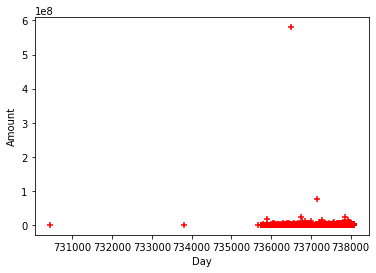

In [79]:
plt.xlabel('Day')
plt.ylabel('Amount')
plt.scatter(df.Day,df.DayAmount,color='red',marker='+')

In [80]:
new_df = df.drop('DayAmount',axis='columns')
new_df

,Day
0,730432
1,733801
2,735682
3,735747
4,735748
...,...
1932,738086
1933,738087
1934,738088
1935,738089


In [81]:
amount = df.DayAmount
amount

0         64000.00
1          8931.00
2             0.00
3         35000.00
4        325000.00
           ...    
1932     249082.00
1933    1138973.36
1934      92900.00
1935    1428457.00
1936    1061968.24
Name: DayAmount, Length: 1937, dtype: float64

In [82]:
df=df.reset_index()['DayAmount']

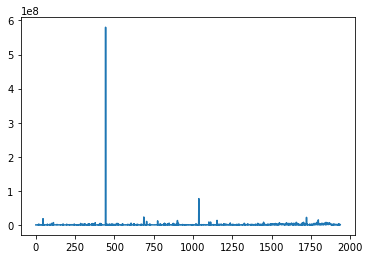

In [83]:
import matplotlib.pyplot as plt
plt.plot(df)

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [85]:
##splitting dataset into train and test split
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [86]:
training_size,test_size

(1452, 485)

In [87]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [88]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [89]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 8s 351ms/step - loss: 0.0012 - accuracy: 7.4019e-04 - val_loss: 1.3025e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 6s 269ms/step - loss: 8.1585e-04 - accuracy: 7.4019e-04 - val_loss: 6.7517e-05 - val_accuracy: 0.0000e+00
Epoch 3/100
22/22 [==============================] - 6s 257ms/step - loss: 7.6496e-04 - accuracy: 7.4019e-04 - val_loss: 1.1664e-05 - val_accuracy: 0.0000e+00
Epoch 4/100
22/22 [==============================] - 6s 269ms/step - loss: 7.6079e-04 - accuracy: 7.4019e-04 - val_loss: 1.3820e-05 - val_accuracy: 0.0000e+00
Epoch 5/100
22/22 [==============================] - 7s 307ms/step - loss: 7.6817e-04 - accuracy: 7.4019e-04 - val_loss: 2.4224e-05 - val_accuracy: 0.0000e+00
Epoch 6/100
22/22 [==============================] - 5s 247ms/step - loss: 7.6247e-04 - accuracy: 7.4019e-04 - val_loss: 3.7488e-05 - val_accuracy: 0.0000e+00
Epoch 7/100
22/22 [==============================]

22/22 [==============================] - 5s 219ms/step - loss: 7.6237e-04 - accuracy: 7.4019e-04 - val_loss: 1.1236e-05 - val_accuracy: 0.0000e+00
Epoch 53/100
22/22 [==============================] - 4s 201ms/step - loss: 7.5809e-04 - accuracy: 7.4019e-04 - val_loss: 1.8636e-05 - val_accuracy: 0.0000e+00
Epoch 54/100
22/22 [==============================] - 5s 212ms/step - loss: 7.6039e-04 - accuracy: 7.4019e-04 - val_loss: 1.9414e-05 - val_accuracy: 0.0000e+00
Epoch 55/100
22/22 [==============================] - 5s 211ms/step - loss: 7.5639e-04 - accuracy: 7.4019e-04 - val_loss: 1.1962e-05 - val_accuracy: 0.0000e+00
Epoch 56/100
22/22 [==============================] - 5s 209ms/step - loss: 7.6157e-04 - accuracy: 7.4019e-04 - val_loss: 1.1476e-05 - val_accuracy: 0.0000e+00
Epoch 57/100
22/22 [==============================] - 4s 205ms/step - loss: 7.5696e-04 - accuracy: 7.4019e-04 - val_loss: 1.1340e-05 - val_accuracy: 0.0000e+00
Epoch 58/100
22/22 [==============================] -

In [90]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [91]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [92]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

353012.7645781827

In [93]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

319860.7941061279

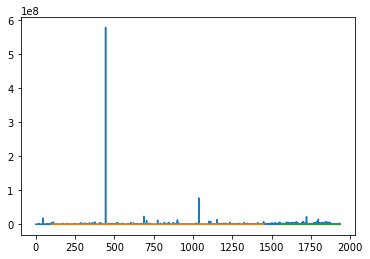

In [94]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [95]:
x_input=test_data[385:].reshape(1,-1)
x_input.shape

(1, 100)

In [96]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [97]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.000574]
101
1 day input [4.14858614e-03 5.01906337e-03 2.85927612e-03 1.90733466e-03
 3.33720889e-03 3.65766716e-03 5.82082996e-04 5.99630700e-03
 1.29372553e-02 4.14552756e-03 3.58954256e-03 4.38267472e-03
 1.91344599e-03 2.14605231e-03 1.42772044e-03 8.84311071e-03
 1.01388816e-02 7.18387533e-03 3.26131561e-03 5.00484941e-03
 8.33288281e-03 7.23598282e-03 4.43203081e-03 2.04252520e-03
 2.91201479e-03 7.31248563e-03 2.05652178e-03 6.69072640e-03
 1.01616978e-02 3.54590717e-03 6.58590460e-03 3.47462780e-03
 9.26923845e-03 3.80947168e-03 5.59043888e-03 5.25178159e-03
 5.97008819e-03 5.75941498e-03 2.79514804e-03 2.31685579e-03
 1.59291065e-04 3.13793220e-03 6.71753177e-04 1.48775958e-03
 2.05088108e-03 1.33341103e-03 1.31848725e-03 2.75828684e-05
 2.74166515e-03 2.16825136e-03 1.93190345e-03 1.33236288e-03
 2.06900820e-03 5.52312461e-05 1.51533383e-04 2.97770899e-03
 1.53355577e-03 2.79760119e-03 2.96213458e-03 1.72425855e-03
 3.15731786e-03 3.65610921e-04 1.65167954e-03 1.43754497e-

6 day output [[0.00056909]]
7 day input [5.82082996e-04 5.99630700e-03 1.29372553e-02 4.14552756e-03
 3.58954256e-03 4.38267472e-03 1.91344599e-03 2.14605231e-03
 1.42772044e-03 8.84311071e-03 1.01388816e-02 7.18387533e-03
 3.26131561e-03 5.00484941e-03 8.33288281e-03 7.23598282e-03
 4.43203081e-03 2.04252520e-03 2.91201479e-03 7.31248563e-03
 2.05652178e-03 6.69072640e-03 1.01616978e-02 3.54590717e-03
 6.58590460e-03 3.47462780e-03 9.26923845e-03 3.80947168e-03
 5.59043888e-03 5.25178159e-03 5.97008819e-03 5.75941498e-03
 2.79514804e-03 2.31685579e-03 1.59291065e-04 3.13793220e-03
 6.71753177e-04 1.48775958e-03 2.05088108e-03 1.33341103e-03
 1.31848725e-03 2.75828684e-05 2.74166515e-03 2.16825136e-03
 1.93190345e-03 1.33236288e-03 2.06900820e-03 5.52312461e-05
 1.51533383e-04 2.97770899e-03 1.53355577e-03 2.79760119e-03
 2.96213458e-03 1.72425855e-03 3.15731786e-03 3.65610921e-04
 1.65167954e-03 1.43754497e-03 2.13430030e-03 1.52779612e-03
 1.25142784e-03 8.19102929e-04 2.34726762e-03

12 day output [[0.00054911]]
13 day input [1.91344599e-03 2.14605231e-03 1.42772044e-03 8.84311071e-03
 1.01388816e-02 7.18387533e-03 3.26131561e-03 5.00484941e-03
 8.33288281e-03 7.23598282e-03 4.43203081e-03 2.04252520e-03
 2.91201479e-03 7.31248563e-03 2.05652178e-03 6.69072640e-03
 1.01616978e-02 3.54590717e-03 6.58590460e-03 3.47462780e-03
 9.26923845e-03 3.80947168e-03 5.59043888e-03 5.25178159e-03
 5.97008819e-03 5.75941498e-03 2.79514804e-03 2.31685579e-03
 1.59291065e-04 3.13793220e-03 6.71753177e-04 1.48775958e-03
 2.05088108e-03 1.33341103e-03 1.31848725e-03 2.75828684e-05
 2.74166515e-03 2.16825136e-03 1.93190345e-03 1.33236288e-03
 2.06900820e-03 5.52312461e-05 1.51533383e-04 2.97770899e-03
 1.53355577e-03 2.79760119e-03 2.96213458e-03 1.72425855e-03
 3.15731786e-03 3.65610921e-04 1.65167954e-03 1.43754497e-03
 2.13430030e-03 1.52779612e-03 1.25142784e-03 8.19102929e-04
 2.34726762e-03 1.45838555e-03 1.64401674e-03 2.06670675e-03
 1.61833214e-03 2.05703213e-03 1.25601748e-

 5.46201481e-04 5.46049792e-04 5.46931056e-04 5.48165990e-04]
19 day output [[0.0005492]]
20 day input [5.00484941e-03 8.33288281e-03 7.23598282e-03 4.43203081e-03
 2.04252520e-03 2.91201479e-03 7.31248563e-03 2.05652178e-03
 6.69072640e-03 1.01616978e-02 3.54590717e-03 6.58590460e-03
 3.47462780e-03 9.26923845e-03 3.80947168e-03 5.59043888e-03
 5.25178159e-03 5.97008819e-03 5.75941498e-03 2.79514804e-03
 2.31685579e-03 1.59291065e-04 3.13793220e-03 6.71753177e-04
 1.48775958e-03 2.05088108e-03 1.33341103e-03 1.31848725e-03
 2.75828684e-05 2.74166515e-03 2.16825136e-03 1.93190345e-03
 1.33236288e-03 2.06900820e-03 5.52312461e-05 1.51533383e-04
 2.97770899e-03 1.53355577e-03 2.79760119e-03 2.96213458e-03
 1.72425855e-03 3.15731786e-03 3.65610921e-04 1.65167954e-03
 1.43754497e-03 2.13430030e-03 1.52779612e-03 1.25142784e-03
 8.19102929e-04 2.34726762e-03 1.45838555e-03 1.64401674e-03
 2.06670675e-03 1.61833214e-03 2.05703213e-03 1.25601748e-03
 3.77023333e-04 2.07663314e-03 1.85908050e-

 5.50503784e-04 5.51436737e-04 5.52168232e-04 5.52495534e-04]
25 day output [[0.00055243]]
26 day input [7.31248563e-03 2.05652178e-03 6.69072640e-03 1.01616978e-02
 3.54590717e-03 6.58590460e-03 3.47462780e-03 9.26923845e-03
 3.80947168e-03 5.59043888e-03 5.25178159e-03 5.97008819e-03
 5.75941498e-03 2.79514804e-03 2.31685579e-03 1.59291065e-04
 3.13793220e-03 6.71753177e-04 1.48775958e-03 2.05088108e-03
 1.33341103e-03 1.31848725e-03 2.75828684e-05 2.74166515e-03
 2.16825136e-03 1.93190345e-03 1.33236288e-03 2.06900820e-03
 5.52312461e-05 1.51533383e-04 2.97770899e-03 1.53355577e-03
 2.79760119e-03 2.96213458e-03 1.72425855e-03 3.15731786e-03
 3.65610921e-04 1.65167954e-03 1.43754497e-03 2.13430030e-03
 1.52779612e-03 1.25142784e-03 8.19102929e-04 2.34726762e-03
 1.45838555e-03 1.64401674e-03 2.06670675e-03 1.61833214e-03
 2.05703213e-03 1.25601748e-03 3.77023333e-04 2.07663314e-03
 1.85908050e-03 7.10024407e-04 1.15596354e-03 4.50228265e-04
 1.59593098e-03 6.98191357e-05 6.44596120e

In [98]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

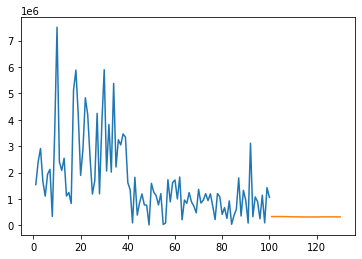

In [99]:
plt.plot(day_new,scaler.inverse_transform(df[1837:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

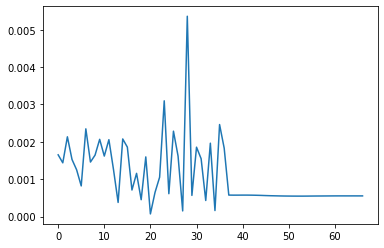

In [100]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1900:])

In [101]:
df1=scaler.inverse_transform(df1).tolist()

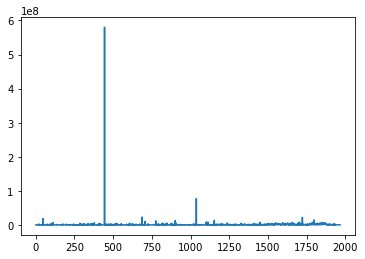

In [102]:
plt.plot(df1)

In [103]:
df1[1938]

[331987.74427630706]

# profit calculate stockTables

In [104]:
buy_Year= {}
for Year, Year_data in buy_data.groupby('Year'):
            print(Year, Year_data['Amount'].sum())
            buy_Year[Year] =Year_data['Amount'].sum() 

2015 4204152.0
2016 72105925.0
2017 72651047.12
2018 81754033.36
2019 139919702.32
2020 260470997.94
2021 584917111.97
2022 2082036.07


In [105]:
data1 = []
for Year in buy_Year:
        data1.append([Year, buy_Year[Year]])

df1 = pd.DataFrame(data1, columns = ['Year', 'YearAmount'])

In [106]:
sale_Year= {}
for Year, Year_data in data.groupby('Year'):
            print(Year, Year_data['Amount'].sum())
            sale_Year[Year] =Year_data['Amount'].sum() 

2001 64000.0
2010 8931.0
2015 8161219.99
2016 81238466.0
2017 729136463.0
2018 174193545.72
2019 264367315.92000002
2020 271000902.89
2021 655948598.35
2022 27384834.759999998


In [107]:
data1 = []
for Year in sale_Year:
        data1.append([Year, sale_Year[Year]])

df2 = pd.DataFrame(data1, columns = ['Year', 'YearAmount'])

In [108]:
df2.drop([0,1],axis=0,inplace=True)

In [109]:
df2=df2.reset_index()

In [110]:
df2

,index,Year,YearAmount
0,2,2015,8.161220e+06
1,3,2016,8.123847e+07
2,4,2017,7.291365e+08
3,5,2018,1.741935e+08
4,6,2019,2.643673e+08
5,7,2020,2.710009e+08
6,8,2021,6.559486e+08
7,9,2022,2.738483e+07


In [111]:
df2.drop(['index'],axis=1,inplace=True)

In [112]:
df2["profit"]=df2["YearAmount"]-df1["YearAmount"]

<AxesSubplot:xlabel='Year', ylabel='profit'>

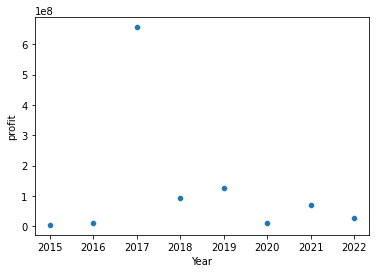

In [113]:
sns.scatterplot(x=df2.Year, y=df2.profit, data=buy_data)

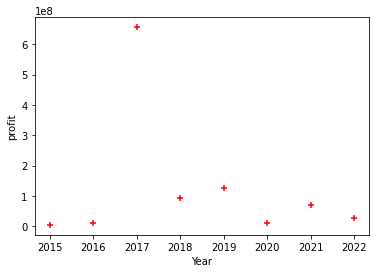

In [114]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('profit')
plt.scatter(df2.Year,df2.profit,color='red',marker='+')

In [115]:
df2=df2.drop('YearAmount',axis='columns')

In [116]:
df2

,Year,profit
0,2015,3.957068e+06
1,2016,9.132541e+06
2,2017,6.564854e+08
3,2018,9.243951e+07
4,2019,1.244476e+08
5,2020,1.052990e+07
6,2021,7.103149e+07
7,2022,2.530280e+07


In [117]:
df2 = df2[df2['Year'] < 2022]

In [118]:
Year = df2.drop('profit',axis='columns')
Year

,Year
0,2015
1,2016
2,2017
3,2018
4,2019
5,2020
6,2021


In [119]:
profit = df2.profit
profit

0    3.957068e+06
1    9.132541e+06
2    6.564854e+08
3    9.243951e+07
4    1.244476e+08
5    1.052990e+07
6    7.103149e+07
Name: profit, dtype: float64

In [120]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Year,profit)

LinearRegression()

In [121]:
lr_predict=reg.predict([[2022]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [122]:
reg.score(Year,profit)

0.01177335844824956

In [123]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()

In [124]:
RFR.fit(Year,profit)

RandomForestRegressor()

In [125]:
rnf_predict=RFR.predict([[2022]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [126]:
RFR.score(Year,profit)

0.8083072436923588

In [127]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()

In [128]:
DTR.fit(Year,profit)

DecisionTreeRegressor()

In [129]:
dr_predict=DTR.predict([[2022]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [130]:
DTR.score(Year,profit)

1.0

In [131]:
print("2022  orginal amount 2.530280e+07tk ")
print("2022 predict amount ", lr_predict ,"tk of Linear Rgression")
print("2022 predict amount ", rnf_predict, "tk of Random Forest Regression")
print("2022 predict amount", dr_predict, "tk of Decision Tree Regression")

2022  orginal amount 2.530280e+07tk 
2022 predict amount  [91429103.27857208] tk of Linear Rgression
2022 predict amount  [65075194.09140001] tk of Random Forest Regression
2022 predict amount [71031486.38] tk of Decision Tree Regression


# per day qty prediction

In [132]:
sale_qty= {}
for day, day_data in data.groupby('Day'):
            print(day, day_data['Qty'].sum())
            sale_qty[day] =day_data['Qty'].sum() 

730432 190.0
733801 2.0
735682 1.0
735747 1.0
735748 1.0
735754 1.0
735755 1.0
735758 1.0
735760 1.0
735761 1.0
735762 41.0
735765 4.0
735774 41.0
735776 1.0
735778 2.0
735783 7.0
735785 1.0
735786 1.0
735789 7.0
735792 5.0
735796 1.0
735800 20.0
735806 13.0
735810 32.0
735812 1.0
735814 1.0
735817 11.0
735824 15.0
735827 1.0
735830 2.0
735833 1.0
735835 30.0
735837 52.0
735843 20.0
735847 1.0
735852 1.0
735854 1.0
735858 1.0
735861 22.0
735875 2.0
735876 2.0
735881 10.0
735884 2.0
735889 1.0
735890 2.0
735891 10.0
735900 5.0
735901 15.0
735909 35.0
735911 1.0
735915 2.0
735917 2.0
735925 1.0
735929 4.0
735933 2.0
735936 1.0
735940 1.0
735943 2.0
735957 1.0
735958 1.0
735961 100.0
735963 1.0
735964 21.0
735965 1.0
735969 30.0
735970 1.0
735972 1.0
735973 9.0
735979 1.0
735980 3.0
735981 3.0
735984 1.0
735986 2.0
735987 1.0
735994 3.0
736000 1.0
736001 1.0
736002 1.0
736004 20.0
736007 1.0
736016 1.0
736018 1.0
736019 20.0
736020 1.0
736021 5.0
736024 2.0
736025 22.0
736026 3.0
736027 2

737006 354.5
737007 68.7
737008 42.5
737009 431.5
737011 131.7
737012 1153.5
737013 12.5
737014 536.5
737015 190.0
737017 1.0
737018 1178.0
737019 70.0
737020 57.0
737021 110.5
737022 315.0
737023 89.0
737026 2.0
737027 237.5
737028 108.0
737029 91.4
737030 93.5
737031 2558.0
737032 63.0
737033 50.0
737034 115.0
737035 151.0
737036 111.5
737037 1300.5
737038 50.0
737039 546.5
737040 253.0
737041 58.0
737042 17.5
737043 1922.0
737044 227.0
737045 245.0
737046 326.5
737048 177.5
737049 173.0
737050 218.5
737051 36.0
737052 81.5
737053 284.5
737054 2.0
737055 269.0
737056 451.5
737057 50.5
737058 2721.5
737059 60.5
737060 6.0
737061 58.5
737062 121.5
737063 36.5
737064 715.5
737065 137.5
737066 77.0
737068 549.0
737069 501.0
737070 799.1
737071 239.0
737072 100.0
737073 76.5
737074 10.0
737075 148.0
737076 27.5
737077 52.0
737078 104.0
737079 312.6
737080 126.2
737081 10.0
737082 22.0
737083 139.0
737084 191.0
737085 105.0
737086 52.0
737087 205.5
737089 129.5
737090 32.5
737091 2247.0
73

737944 10390.8
737945 1452.0
737946 9566.5
737947 20171.199999999997
737948 19782.4
737949 10298.4
737950 13238.0
737951 4276.7
737952 7160.200000000001
737953 7989.9
737954 2700.6
737955 5472.2
737956 11242.5
737957 3408.2
737958 11218.3
737959 25.0
737960 5094.0
737961 432.0
737962 628.0
737963 4591.3
737964 8618.6
737965 3282.4
737966 9197.4
737967 7034.7
737968 5536.7
737969 764.1
737970 19351.0
737971 6983.800000000001
737972 1086.0
737973 10680.500000000002
737974 21456.200000000004
737975 16751.8
737976 4078.7
737977 13434.099999999999
737978 810.7
737979 18696.7
737980 11368.8
737981 1937.7
737982 8623.6
737983 12320.1
737984 588.2
737985 13977.500000000002
737986 19674.7
737987 14332.7
737988 16418.19
737989 18709.899999999998
737990 3690.5
737991 3305.4
737992 7505.400000000001
737993 9791.079999999998
737994 2239.4
737995 15957.0
737996 13384.2
737997 5440.1
737998 10569.400000000001
737999 9212.9
738000 10895.5
738001 866.0999999999998
738002 381.0
738003 48672.899999999994

In [133]:
data1 = []
for day in sale_qty:
    if(day!=738091):
        data1.append([day, sale_qty[day]])

df3 = pd.DataFrame(data1, columns = ['Day', 'Qty'])

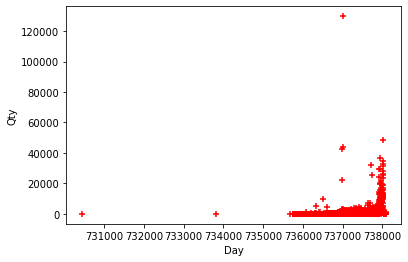

In [134]:
%matplotlib inline
plt.xlabel('Day')
plt.ylabel('Qty')
plt.scatter(df3.Day,df3.Qty,color='red',marker='+')

In [135]:
df3=df3.reset_index()['Qty']

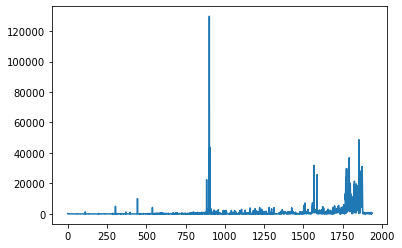

In [136]:
import matplotlib.pyplot as plt
plt.plot(df3)

In [137]:
df=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [138]:
##splitting dataset into train and test split
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [139]:
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [140]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)/200
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)/200

In [141]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 5s 206ms/step - loss: 9.4109e-04 - accuracy: 0.0015 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 5s 218ms/step - loss: 9.4139e-04 - accuracy: 0.0015 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 3/100
22/22 [==============================] - 5s 217ms/step - loss: 9.4400e-04 - accuracy: 0.0015 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 4/100
22/22 [==============================] - 4s 204ms/step - loss: 9.4130e-04 - accuracy: 0.0015 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 5/100
22/22 [==============================] - 4s 205ms/step - loss: 9.4866e-04 - accuracy: 0.0015 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 6/100
22/22 [==============================] - 5s 222ms/step - loss: 9.3994e-04 - accuracy: 0.0015 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 7/100
22/22 [==============================] - 5s 204ms/step - loss: 9.4478e-04 - accura

Epoch 55/100
22/22 [==============================] - 4s 204ms/step - loss: 9.4244e-04 - accuracy: 0.0015 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 56/100
22/22 [==============================] - 5s 228ms/step - loss: 9.4193e-04 - accuracy: 0.0015 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 57/100
22/22 [==============================] - 5s 228ms/step - loss: 9.3981e-04 - accuracy: 0.0015 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 58/100
22/22 [==============================] - 5s 213ms/step - loss: 9.4066e-04 - accuracy: 0.0015 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 59/100
22/22 [==============================] - 6s 265ms/step - loss: 9.4574e-04 - accuracy: 0.0015 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 60/100
22/22 [==============================] - 6s 273ms/step - loss: 9.3963e-04 - accuracy: 0.0015 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 61/100
22/22 [==============================] - 5s 247ms/step - loss: 9.3984e-04 -

In [142]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [143]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

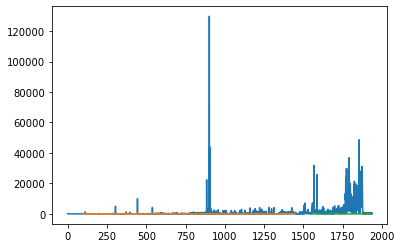

In [144]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [145]:
training_size,test_size

(1452, 485)

In [146]:
x_input=test_data[385:].reshape(1,-1)
x_input.shape

(1, 100)

In [147]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [148]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.00188591]
101
1 day input [1.26563495e-01 1.44230221e-01 2.84461027e-02 2.54773780e-02
 5.78550559e-02 7.54752966e-02 1.72596150e-02 1.23008195e-01
 1.03174554e-01 4.19337183e-02 8.14753429e-02 7.10181238e-02
 8.39892383e-02 6.67288524e-03 2.93326344e-03 3.75214117e-01
 2.65262606e-01 2.50703444e-01 8.79878815e-02 1.97293380e-01
 2.18249447e-01 3.82573100e-02 7.99420285e-02 4.62152807e-03
 2.41737910e-02 1.19064285e-01 7.38434616e-02 1.30177538e-01
 9.05256747e-02 3.32025378e-02 9.51117415e-02 1.01896407e-01
 2.04433429e-01 1.48736885e-01 1.07929447e-01 2.40072002e-01
 1.80060747e-01 8.43014516e-02 5.60935561e-02 3.75041436e-03
 1.88869788e-04 8.35267000e-03 3.36496581e-03 2.58635975e-03
 6.87254758e-03 3.78895921e-03 5.07096108e-03 3.85448546e-06
 4.32087821e-03 3.90459378e-03 6.38302793e-03 5.29220854e-03
 3.75041436e-03 8.86531657e-05 3.46903692e-05 5.05323044e-03
 1.54564867e-03 3.40351067e-03 2.26258297e-03 1.69211912e-03
 7.00360009e-03 2.50541555e-04 3.31100301e-03 6.07852358

 1.86945638e-03 1.86234049e-03 1.85473578e-03 1.84754061e-03]
7 day output [[0.0018409]]
8 day input [1.23008195e-01 1.03174554e-01 4.19337183e-02 8.14753429e-02
 7.10181238e-02 8.39892383e-02 6.67288524e-03 2.93326344e-03
 3.75214117e-01 2.65262606e-01 2.50703444e-01 8.79878815e-02
 1.97293380e-01 2.18249447e-01 3.82573100e-02 7.99420285e-02
 4.62152807e-03 2.41737910e-02 1.19064285e-01 7.38434616e-02
 1.30177538e-01 9.05256747e-02 3.32025378e-02 9.51117415e-02
 1.01896407e-01 2.04433429e-01 1.48736885e-01 1.07929447e-01
 2.40072002e-01 1.80060747e-01 8.43014516e-02 5.60935561e-02
 3.75041436e-03 1.88869788e-04 8.35267000e-03 3.36496581e-03
 2.58635975e-03 6.87254758e-03 3.78895921e-03 5.07096108e-03
 3.85448546e-06 4.32087821e-03 3.90459378e-03 6.38302793e-03
 5.29220854e-03 3.75041436e-03 8.86531657e-05 3.46903692e-05
 5.05323044e-03 1.54564867e-03 3.40351067e-03 2.26258297e-03
 1.69211912e-03 7.00360009e-03 2.50541555e-04 3.31100301e-03
 6.07852358e-03 3.16453257e-03 3.72728744e-03

 1.82969752e-03 1.82624941e-03 1.82285602e-03 1.82148116e-03]
13 day output [[0.00182107]]
14 day input [6.67288524e-03 2.93326344e-03 3.75214117e-01 2.65262606e-01
 2.50703444e-01 8.79878815e-02 1.97293380e-01 2.18249447e-01
 3.82573100e-02 7.99420285e-02 4.62152807e-03 2.41737910e-02
 1.19064285e-01 7.38434616e-02 1.30177538e-01 9.05256747e-02
 3.32025378e-02 9.51117415e-02 1.01896407e-01 2.04433429e-01
 1.48736885e-01 1.07929447e-01 2.40072002e-01 1.80060747e-01
 8.43014516e-02 5.60935561e-02 3.75041436e-03 1.88869788e-04
 8.35267000e-03 3.36496581e-03 2.58635975e-03 6.87254758e-03
 3.78895921e-03 5.07096108e-03 3.85448546e-06 4.32087821e-03
 3.90459378e-03 6.38302793e-03 5.29220854e-03 3.75041436e-03
 8.86531657e-05 3.46903692e-05 5.05323044e-03 1.54564867e-03
 3.40351067e-03 2.26258297e-03 1.69211912e-03 7.00360009e-03
 2.50541555e-04 3.31100301e-03 6.07852358e-03 3.16453257e-03
 3.72728744e-03 3.79666818e-03 4.59840116e-03 1.56877558e-03
 2.66344946e-03 4.34400512e-03 5.27679060e

 1.82236929e-03 1.82364834e-03 1.83300301e-03 1.84035685e-03]
19 day output [[0.00184761]]
20 day input [1.97293380e-01 2.18249447e-01 3.82573100e-02 7.99420285e-02
 4.62152807e-03 2.41737910e-02 1.19064285e-01 7.38434616e-02
 1.30177538e-01 9.05256747e-02 3.32025378e-02 9.51117415e-02
 1.01896407e-01 2.04433429e-01 1.48736885e-01 1.07929447e-01
 2.40072002e-01 1.80060747e-01 8.43014516e-02 5.60935561e-02
 3.75041436e-03 1.88869788e-04 8.35267000e-03 3.36496581e-03
 2.58635975e-03 6.87254758e-03 3.78895921e-03 5.07096108e-03
 3.85448546e-06 4.32087821e-03 3.90459378e-03 6.38302793e-03
 5.29220854e-03 3.75041436e-03 8.86531657e-05 3.46903692e-05
 5.05323044e-03 1.54564867e-03 3.40351067e-03 2.26258297e-03
 1.69211912e-03 7.00360009e-03 2.50541555e-04 3.31100301e-03
 6.07852358e-03 3.16453257e-03 3.72728744e-03 3.79666818e-03
 4.59840116e-03 1.56877558e-03 2.66344946e-03 4.34400512e-03
 5.27679060e-03 6.88796553e-03 3.84292201e-03 4.62923704e-03
 1.27198020e-04 3.48060037e-03 4.41338586e

 1.85814209e-03 1.86526787e-03 1.86838361e-03 1.87271589e-03]
25 day output [[0.00187553]]
26 day input [1.19064285e-01 7.38434616e-02 1.30177538e-01 9.05256747e-02
 3.32025378e-02 9.51117415e-02 1.01896407e-01 2.04433429e-01
 1.48736885e-01 1.07929447e-01 2.40072002e-01 1.80060747e-01
 8.43014516e-02 5.60935561e-02 3.75041436e-03 1.88869788e-04
 8.35267000e-03 3.36496581e-03 2.58635975e-03 6.87254758e-03
 3.78895921e-03 5.07096108e-03 3.85448546e-06 4.32087821e-03
 3.90459378e-03 6.38302793e-03 5.29220854e-03 3.75041436e-03
 8.86531657e-05 3.46903692e-05 5.05323044e-03 1.54564867e-03
 3.40351067e-03 2.26258297e-03 1.69211912e-03 7.00360009e-03
 2.50541555e-04 3.31100301e-03 6.07852358e-03 3.16453257e-03
 3.72728744e-03 3.79666818e-03 4.59840116e-03 1.56877558e-03
 2.66344946e-03 4.34400512e-03 5.27679060e-03 6.88796553e-03
 3.84292201e-03 4.62923704e-03 1.27198020e-04 3.48060037e-03
 4.41338586e-03 3.34954787e-03 3.16453257e-03 2.31654576e-03
 5.53889561e-03 2.69813983e-05 8.67259230e

32 day output [[0.00190852]]
33 day input [2.04433429e-01 1.48736885e-01 1.07929447e-01 2.40072002e-01
 1.80060747e-01 8.43014516e-02 5.60935561e-02 3.75041436e-03
 1.88869788e-04 8.35267000e-03 3.36496581e-03 2.58635975e-03
 6.87254758e-03 3.78895921e-03 5.07096108e-03 3.85448546e-06
 4.32087821e-03 3.90459378e-03 6.38302793e-03 5.29220854e-03
 3.75041436e-03 8.86531657e-05 3.46903692e-05 5.05323044e-03
 1.54564867e-03 3.40351067e-03 2.26258297e-03 1.69211912e-03
 7.00360009e-03 2.50541555e-04 3.31100301e-03 6.07852358e-03
 3.16453257e-03 3.72728744e-03 3.79666818e-03 4.59840116e-03
 1.56877558e-03 2.66344946e-03 4.34400512e-03 5.27679060e-03
 6.88796553e-03 3.84292201e-03 4.62923704e-03 1.27198020e-04
 3.48060037e-03 4.41338586e-03 3.34954787e-03 3.16453257e-03
 2.31654576e-03 5.53889561e-03 2.69813983e-05 8.67259230e-04
 5.43867899e-03 5.38471619e-03 3.85833995e-03 4.11273599e-03
 5.39242517e-03 7.74751578e-04 7.88242278e-03 7.67042607e-04
 4.07419114e-03 5.62369429e-03 9.82893794e-

40 day output [[0.00193708]]
41 day input [1.88869788e-04 8.35267000e-03 3.36496581e-03 2.58635975e-03
 6.87254758e-03 3.78895921e-03 5.07096108e-03 3.85448546e-06
 4.32087821e-03 3.90459378e-03 6.38302793e-03 5.29220854e-03
 3.75041436e-03 8.86531657e-05 3.46903692e-05 5.05323044e-03
 1.54564867e-03 3.40351067e-03 2.26258297e-03 1.69211912e-03
 7.00360009e-03 2.50541555e-04 3.31100301e-03 6.07852358e-03
 3.16453257e-03 3.72728744e-03 3.79666818e-03 4.59840116e-03
 1.56877558e-03 2.66344946e-03 4.34400512e-03 5.27679060e-03
 6.88796553e-03 3.84292201e-03 4.62923704e-03 1.27198020e-04
 3.48060037e-03 4.41338586e-03 3.34954787e-03 3.16453257e-03
 2.31654576e-03 5.53889561e-03 2.69813983e-05 8.67259230e-04
 5.43867899e-03 5.38471619e-03 3.85833995e-03 4.11273599e-03
 5.39242517e-03 7.74751578e-04 7.88242278e-03 7.67042607e-04
 4.07419114e-03 5.62369429e-03 9.82893794e-04 5.61598532e-03
 5.78172820e-05 3.99710143e-03 3.94313863e-03 1.88590831e-03
 1.87941245e-03 1.87427527e-03 1.86945638e-

47 day output [[0.00193591]]
48 day input [3.85448546e-06 4.32087821e-03 3.90459378e-03 6.38302793e-03
 5.29220854e-03 3.75041436e-03 8.86531657e-05 3.46903692e-05
 5.05323044e-03 1.54564867e-03 3.40351067e-03 2.26258297e-03
 1.69211912e-03 7.00360009e-03 2.50541555e-04 3.31100301e-03
 6.07852358e-03 3.16453257e-03 3.72728744e-03 3.79666818e-03
 4.59840116e-03 1.56877558e-03 2.66344946e-03 4.34400512e-03
 5.27679060e-03 6.88796553e-03 3.84292201e-03 4.62923704e-03
 1.27198020e-04 3.48060037e-03 4.41338586e-03 3.34954787e-03
 3.16453257e-03 2.31654576e-03 5.53889561e-03 2.69813983e-05
 8.67259230e-04 5.43867899e-03 5.38471619e-03 3.85833995e-03
 4.11273599e-03 5.39242517e-03 7.74751578e-04 7.88242278e-03
 7.67042607e-04 4.07419114e-03 5.62369429e-03 9.82893794e-04
 5.61598532e-03 5.78172820e-05 3.99710143e-03 3.94313863e-03
 1.88590831e-03 1.87941245e-03 1.87427527e-03 1.86945638e-03
 1.86234049e-03 1.85473578e-03 1.84754061e-03 1.84089562e-03
 1.83384935e-03 1.82969752e-03 1.82624941e-

55 day output [[0.00193409]]
56 day input [5.05323044e-03 1.54564867e-03 3.40351067e-03 2.26258297e-03
 1.69211912e-03 7.00360009e-03 2.50541555e-04 3.31100301e-03
 6.07852358e-03 3.16453257e-03 3.72728744e-03 3.79666818e-03
 4.59840116e-03 1.56877558e-03 2.66344946e-03 4.34400512e-03
 5.27679060e-03 6.88796553e-03 3.84292201e-03 4.62923704e-03
 1.27198020e-04 3.48060037e-03 4.41338586e-03 3.34954787e-03
 3.16453257e-03 2.31654576e-03 5.53889561e-03 2.69813983e-05
 8.67259230e-04 5.43867899e-03 5.38471619e-03 3.85833995e-03
 4.11273599e-03 5.39242517e-03 7.74751578e-04 7.88242278e-03
 7.67042607e-04 4.07419114e-03 5.62369429e-03 9.82893794e-04
 5.61598532e-03 5.78172820e-05 3.99710143e-03 3.94313863e-03
 1.88590831e-03 1.87941245e-03 1.87427527e-03 1.86945638e-03
 1.86234049e-03 1.85473578e-03 1.84754061e-03 1.84089562e-03
 1.83384935e-03 1.82969752e-03 1.82624941e-03 1.82285602e-03
 1.82148116e-03 1.82107266e-03 1.82199455e-03 1.82236929e-03
 1.82364834e-03 1.83300301e-03 1.84035685e-

62 day output [[0.00193304]]
63 day input [3.31100301e-03 6.07852358e-03 3.16453257e-03 3.72728744e-03
 3.79666818e-03 4.59840116e-03 1.56877558e-03 2.66344946e-03
 4.34400512e-03 5.27679060e-03 6.88796553e-03 3.84292201e-03
 4.62923704e-03 1.27198020e-04 3.48060037e-03 4.41338586e-03
 3.34954787e-03 3.16453257e-03 2.31654576e-03 5.53889561e-03
 2.69813983e-05 8.67259230e-04 5.43867899e-03 5.38471619e-03
 3.85833995e-03 4.11273599e-03 5.39242517e-03 7.74751578e-04
 7.88242278e-03 7.67042607e-04 4.07419114e-03 5.62369429e-03
 9.82893794e-04 5.61598532e-03 5.78172820e-05 3.99710143e-03
 3.94313863e-03 1.88590831e-03 1.87941245e-03 1.87427527e-03
 1.86945638e-03 1.86234049e-03 1.85473578e-03 1.84754061e-03
 1.84089562e-03 1.83384935e-03 1.82969752e-03 1.82624941e-03
 1.82285602e-03 1.82148116e-03 1.82107266e-03 1.82199455e-03
 1.82236929e-03 1.82364834e-03 1.83300301e-03 1.84035685e-03
 1.84761325e-03 1.85153086e-03 1.85814209e-03 1.86526787e-03
 1.86838361e-03 1.87271589e-03 1.87553302e-

 1.93277141e-03 1.93274068e-03 1.93272147e-03 1.93272450e-03]
70 day output [[0.00193269]]
71 day input [4.34400512e-03 5.27679060e-03 6.88796553e-03 3.84292201e-03
 4.62923704e-03 1.27198020e-04 3.48060037e-03 4.41338586e-03
 3.34954787e-03 3.16453257e-03 2.31654576e-03 5.53889561e-03
 2.69813983e-05 8.67259230e-04 5.43867899e-03 5.38471619e-03
 3.85833995e-03 4.11273599e-03 5.39242517e-03 7.74751578e-04
 7.88242278e-03 7.67042607e-04 4.07419114e-03 5.62369429e-03
 9.82893794e-04 5.61598532e-03 5.78172820e-05 3.99710143e-03
 3.94313863e-03 1.88590831e-03 1.87941245e-03 1.87427527e-03
 1.86945638e-03 1.86234049e-03 1.85473578e-03 1.84754061e-03
 1.84089562e-03 1.83384935e-03 1.82969752e-03 1.82624941e-03
 1.82285602e-03 1.82148116e-03 1.82107266e-03 1.82199455e-03
 1.82236929e-03 1.82364834e-03 1.83300301e-03 1.84035685e-03
 1.84761325e-03 1.85153086e-03 1.85814209e-03 1.86526787e-03
 1.86838361e-03 1.87271589e-03 1.87553302e-03 1.87909231e-03
 1.88492599e-03 1.88967446e-03 1.89555553e

 1.93276710e-03 1.93284836e-03 1.93288294e-03 1.93293591e-03]
77 day output [[0.00193292]]
78 day input [4.41338586e-03 3.34954787e-03 3.16453257e-03 2.31654576e-03
 5.53889561e-03 2.69813983e-05 8.67259230e-04 5.43867899e-03
 5.38471619e-03 3.85833995e-03 4.11273599e-03 5.39242517e-03
 7.74751578e-04 7.88242278e-03 7.67042607e-04 4.07419114e-03
 5.62369429e-03 9.82893794e-04 5.61598532e-03 5.78172820e-05
 3.99710143e-03 3.94313863e-03 1.88590831e-03 1.87941245e-03
 1.87427527e-03 1.86945638e-03 1.86234049e-03 1.85473578e-03
 1.84754061e-03 1.84089562e-03 1.83384935e-03 1.82969752e-03
 1.82624941e-03 1.82285602e-03 1.82148116e-03 1.82107266e-03
 1.82199455e-03 1.82236929e-03 1.82364834e-03 1.83300301e-03
 1.84035685e-03 1.84761325e-03 1.85153086e-03 1.85814209e-03
 1.86526787e-03 1.86838361e-03 1.87271589e-03 1.87553302e-03
 1.87909231e-03 1.88492599e-03 1.88967446e-03 1.89555553e-03
 1.90036220e-03 1.90385745e-03 1.90851756e-03 1.91303098e-03
 1.91903184e-03 1.92339823e-03 1.92660931e

84 day output [[0.00193333]]
85 day input [5.43867899e-03 5.38471619e-03 3.85833995e-03 4.11273599e-03
 5.39242517e-03 7.74751578e-04 7.88242278e-03 7.67042607e-04
 4.07419114e-03 5.62369429e-03 9.82893794e-04 5.61598532e-03
 5.78172820e-05 3.99710143e-03 3.94313863e-03 1.88590831e-03
 1.87941245e-03 1.87427527e-03 1.86945638e-03 1.86234049e-03
 1.85473578e-03 1.84754061e-03 1.84089562e-03 1.83384935e-03
 1.82969752e-03 1.82624941e-03 1.82285602e-03 1.82148116e-03
 1.82107266e-03 1.82199455e-03 1.82236929e-03 1.82364834e-03
 1.83300301e-03 1.84035685e-03 1.84761325e-03 1.85153086e-03
 1.85814209e-03 1.86526787e-03 1.86838361e-03 1.87271589e-03
 1.87553302e-03 1.87909231e-03 1.88492599e-03 1.88967446e-03
 1.89555553e-03 1.90036220e-03 1.90385745e-03 1.90851756e-03
 1.91303098e-03 1.91903184e-03 1.92339823e-03 1.92660931e-03
 1.93158153e-03 1.93491369e-03 1.93631300e-03 1.93708471e-03
 1.93693826e-03 1.93673139e-03 1.93664874e-03 1.93646993e-03
 1.93626736e-03 1.93611952e-03 1.93590601e-

90 day output [[0.00193383]]
91 day input [7.88242278e-03 7.67042607e-04 4.07419114e-03 5.62369429e-03
 9.82893794e-04 5.61598532e-03 5.78172820e-05 3.99710143e-03
 3.94313863e-03 1.88590831e-03 1.87941245e-03 1.87427527e-03
 1.86945638e-03 1.86234049e-03 1.85473578e-03 1.84754061e-03
 1.84089562e-03 1.83384935e-03 1.82969752e-03 1.82624941e-03
 1.82285602e-03 1.82148116e-03 1.82107266e-03 1.82199455e-03
 1.82236929e-03 1.82364834e-03 1.83300301e-03 1.84035685e-03
 1.84761325e-03 1.85153086e-03 1.85814209e-03 1.86526787e-03
 1.86838361e-03 1.87271589e-03 1.87553302e-03 1.87909231e-03
 1.88492599e-03 1.88967446e-03 1.89555553e-03 1.90036220e-03
 1.90385745e-03 1.90851756e-03 1.91303098e-03 1.91903184e-03
 1.92339823e-03 1.92660931e-03 1.93158153e-03 1.93491369e-03
 1.93631300e-03 1.93708471e-03 1.93693826e-03 1.93673139e-03
 1.93664874e-03 1.93646993e-03 1.93626736e-03 1.93611952e-03
 1.93590601e-03 1.93570228e-03 1.93541171e-03 1.93519180e-03
 1.93496409e-03 1.93477736e-03 1.93457503e-

96 day output [[0.00193413]]
97 day input [5.78172820e-05 3.99710143e-03 3.94313863e-03 1.88590831e-03
 1.87941245e-03 1.87427527e-03 1.86945638e-03 1.86234049e-03
 1.85473578e-03 1.84754061e-03 1.84089562e-03 1.83384935e-03
 1.82969752e-03 1.82624941e-03 1.82285602e-03 1.82148116e-03
 1.82107266e-03 1.82199455e-03 1.82236929e-03 1.82364834e-03
 1.83300301e-03 1.84035685e-03 1.84761325e-03 1.85153086e-03
 1.85814209e-03 1.86526787e-03 1.86838361e-03 1.87271589e-03
 1.87553302e-03 1.87909231e-03 1.88492599e-03 1.88967446e-03
 1.89555553e-03 1.90036220e-03 1.90385745e-03 1.90851756e-03
 1.91303098e-03 1.91903184e-03 1.92339823e-03 1.92660931e-03
 1.93158153e-03 1.93491369e-03 1.93631300e-03 1.93708471e-03
 1.93693826e-03 1.93673139e-03 1.93664874e-03 1.93646993e-03
 1.93626736e-03 1.93611952e-03 1.93590601e-03 1.93570228e-03
 1.93541171e-03 1.93519180e-03 1.93496409e-03 1.93477736e-03
 1.93457503e-03 1.93435501e-03 1.93409040e-03 1.93384523e-03
 1.93369761e-03 1.93350750e-03 1.93336455e-

In [149]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

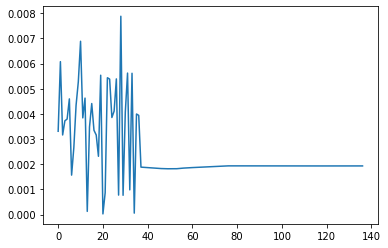

In [150]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1900:])

In [151]:
df1=scaler.inverse_transform(df1).tolist()

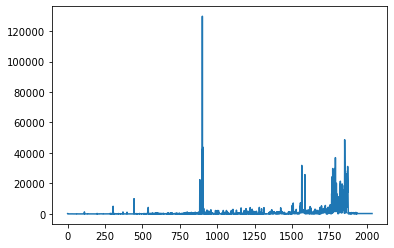

In [152]:
plt.plot(df1)

In [153]:
len(df1)

2037

In [154]:
df1[1938]

[244.29550334648226]